# Data PreProcessing

# Import all the crucial libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import the dataset

In [4]:
dataset = pd.read_csv("Data.csv")

In [5]:
df = pd.DataFrame(dataset)

In [6]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [9]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


 # Identifying and handling the missing values

In [10]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

# Solution 1 : Dropna

In [11]:
df1 = df.copy()

In [12]:
# summarize the shape of the raw data
print("Before:",df1.shape)

# drop rows with missing values
df1.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After:",df1.shape)

Before: (10, 4)
After: (8, 4)


# Solution 1 : Fillna

In [13]:
df2 = df.copy()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df2['Age'].fillna(df2['Age'].mean(), inplace=True)

In [16]:
df2['Salary'].fillna(df2['Salary'].mean(), inplace=True)

In [17]:
print(df2.isnull().sum())

df2

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# Solution 3 : Scikit-Learn

In [18]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [20]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding the categorical data

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [23]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [24]:
df2

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [25]:
pd.get_dummies(df2)

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,True,False,False,True,False
1,27.000000,48000.000000,False,False,True,False,True
2,30.000000,54000.000000,False,True,False,True,False
3,38.000000,61000.000000,False,False,True,True,False
4,40.000000,63777.777778,False,True,False,False,True
5,35.000000,58000.000000,True,False,False,False,True
6,38.777778,52000.000000,False,False,True,True,False
7,48.000000,79000.000000,True,False,False,False,True
8,50.000000,83000.000000,False,True,False,True,False
9,37.000000,67000.000000,True,False,False,False,True


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [30]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [31]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [32]:
print(y_test)

[0 1]


# Standard Scaler
StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance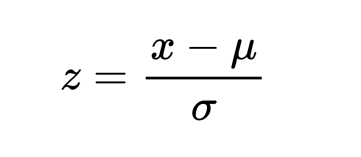!

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])

In [34]:
print(X_train[:, 3:])

[[0.5120772946859904 0.11428571428571432]
 [0.5652173913043479 0.45079365079365075]
 [0.7391304347826089 0.6857142857142855]
 [0.4782608695652175 0.37142857142857144]
 [0.0 0.0]
 [0.9130434782608696 0.8857142857142857]
 [1.0 1.0]
 [0.34782608695652173 0.2857142857142856]]


In [35]:
print(X_test[:, 3:])

[[0.1304347826086958 0.17142857142857149]
 [0.43478260869565233 0.5428571428571427]]


In [36]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train[:, 3:] = sta.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sta.transform(X_test[:, 3:])

In [37]:
print(X_train[:, 3:])

[[-0.19159184384578537 -1.0781259408412425]
 [-0.014117293757057581 -0.07013167641635436]
 [0.5667085065333245 0.6335624327104541]
 [-0.3045301939022482 -0.3078661727429788]
 [-1.9018011447007983 -1.4204636155515822]
 [1.1475343068237058 1.2326533634535486]
 [1.4379472069688963 1.5749910381638883]
 [-0.740149544120035 -0.5646194287757338]]


In [38]:
print(X_test[:, 3:])

[[-1.4661817944830116 -0.9069571034860727]
 [-0.4497366439748436 0.20564033932252992]]


# When to Use Feature Scalling? 
k-nearest neighbors with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

Scaling is critical, while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.

We can speed up gradient descent by scaling. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

# Normalization Vs. Standardization
The two most discussed scaling methods are Normalization and Standardization. Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance)!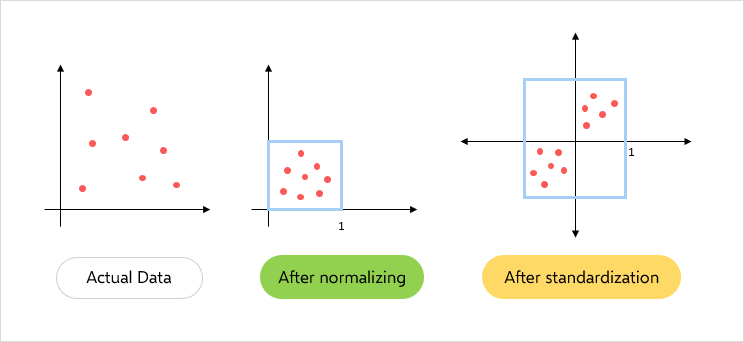